In [54]:
import pandas as pd
import numpy as np

train_path = 'E:\\Studies\\Competition\\Dataset\\rab\\train_df.csv'
test_path = 'E:\\Studies\\Competition\\Dataset\\rab\\test_df.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


In [55]:
# print(train_df.info())
# print(train_df.head())

# print(test_df.info())
# print(test_df.head())

train_df.head()


,summary,genre,Label,cleaned_summary
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2,বই চাঁদের পাহাড় ধরন অ্যাডভেঞ্চার লেখক বিভূতিভ...
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0,বেশির ভাগ বই ই আমার ভাললাগে কিন্তু এই টাইপের ব...
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,Fiction,0,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...
3,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,Fiction,0,ছোটজাতের ছোটজাত হাসিম পিতৃপ্রদত্ত নামখানা একরক...
4,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,Political,3,ফালতু একটা বই পয়সা নষ্ট বাজে লেখনী একই জিনিস ব...


In [56]:
# Drop rows with missing values
train_df["cleaned_summary"].fillna("কিছু একটা হবে কি হবে জানি না দেখা যাক আশা করি ভালো কিছুই হবে", inplace = True)
test_df["cleaned_summary"].fillna("কিছু একটা হবে কি হবে জানি না দেখা যাক আশা করি ভালো কিছুই হবে", inplace = True)


In [57]:
test_df.isnull().sum()

Id                 0
summary            0
cleaned_summary    0
dtype: int64

In [58]:
import re

def clean_text(text):
    # Remove any special characters, numbers, etc.
    # words_to_clean_visarga = ['নাম', 'লেখক', 'প্রকাশনী', 'ধরণ', 'বই', 'মূল্য', 'পৃষ্টা', 'প্রকাশক', 'অনুবাদক']
    # pattern = '(' + '|'.join(words_to_clean_visarga) + ')ঃ'
    # text = re.sub(pattern, r'\1', text)
    # text = re.sub(r'[^\u0980-\u09FF]', ' ', text)  
    # text = re.sub(r'[\u09E6-\u09EF]', '', text) 
    # text = re.sub(r'\s+', ' ', text).strip() 
    text = re.sub('নাম', '', text)
    text = re.sub('লেখক', '', text)
    text = re.sub('প্রকাশনী', '', text)
    text = re.sub('ধরণ', '', text)
    text = re.sub('বই', '', text)
    text = re.sub('মূল্য', '', text)
    text = re.sub('পৃষ্টা', '', text)
    text = re.sub('প্রকাশক', '', text)
    text = re.sub('অনুবাদক', '', text)
    text = re.sub('বইয়ের', '', text)
    return text

# Text cleaning on the 'summary' column
train_df['cleaned_summary'] = train_df['summary'].apply(clean_text)
test_df['cleaned_summary'] = test_df['summary'].apply(clean_text)

In [59]:
test_df.shape

(687, 3)

In [60]:
import pandas as pd
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize the sentences
train_sentences = train_df['cleaned_summary'].apply(word_tokenize).tolist()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tanji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:
from bnlp import BengaliWord2Vec

bwv = BengaliWord2Vec()

def document_vector(word_list):

    # Initialize an empty list to hold the vectors
    doc_vectors = []
    for word in word_list:
        try:
            # Try to retrieve the vector for 'word'
            word_vector = bwv.get_word_vector(word)
            doc_vectors.append(word_vector)

        except KeyError:
            # If the word is not in the model's vocabulary, skip it
            continue

    # If there are no vectors in doc_vectors (e.g., when all words are out-of-vocabulary), return a zero vector
    if not doc_vectors:
        return np.zeros(100)  # Adjust the size to match the BNLP model's vector size
    
    # Average the word vectors to create a single vector for the document
    return np.mean(doc_vectors, axis=0)

# Prepare the input for the document_vector function
train_sentences = train_df['cleaned_summary'].apply(lambda x: x.split()).tolist()

# Generate document vectors for each summary
train_vectors = np.array([document_vector(doc) for doc in train_sentences])

# Prepare the labels for training
train_labels = train_df['Label'].values


In [62]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_vectors, 
    train_labels, 
    test_size=0.2,   # 80% for training and 20% for validation
    random_state=42  # Seed for reproducibility
)


Label
0    1345
1     702
2     497
3     439
4     410
5     297
6     196
Name: count, dtype: int64


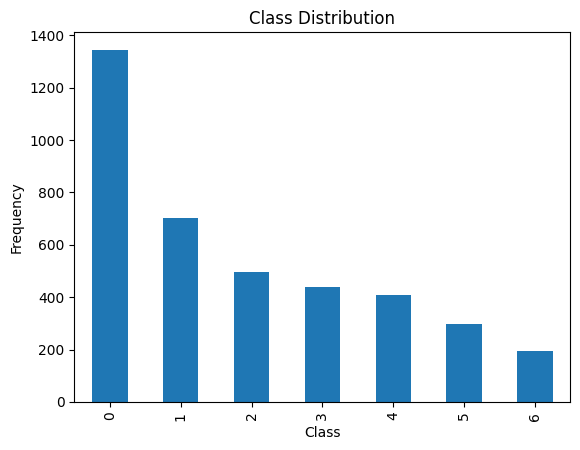

In [63]:
# Check for class distribution
class_distribution = train_df['Label'].value_counts()
print(class_distribution)

# Visualize class distribution
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()


In [64]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)


In [65]:
# from imblearn.over_sampling import SMOTE

# # Initialize SMOTE
# smote = SMOTE()

# # Resample the training data
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [66]:
# from collections import Counter

# # Class distribution in the resampled training set
# resampled_class_distribution = Counter(y_train_resampled)
# print(resampled_class_distribution)

# # Visualizing the new class distribution
# resampled_class_distribution_df = pd.DataFrame(list(resampled_class_distribution.items()), columns=['Class', 'Frequency']).sort_values(by='Class')
# resampled_class_distribution_df.plot(kind='bar', x='Class', y='Frequency')
# plt.xlabel('Class')
# plt.ylabel('Frequency')
# plt.title('Class Distribution after SMOTE')
# plt.show()


In [67]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name = "sagorsarker/bangla-bert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=7)  # Adjust num_labels to match your dataset


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sagorsarker/bangla-bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [68]:
# Tokenize and align the sequences to the same length
max_length = 512  # BERT models typically work with sequences of up to 512 tokens
X_train_tokenized = tokenizer(
    train_df['cleaned_summary'].tolist(),
    padding=True,
    truncation=True,
    max_length=max_length,
    return_tensors="pt"
)


In [69]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Create a dataset from the encoded tokens and labels
train_dataset = TensorDataset(
    X_train_tokenized['input_ids'],
    X_train_tokenized['attention_mask'],
    torch.tensor(train_df['Label'].tolist())
)

# Create a data loader
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [70]:
torch.cuda.empty_cache()

In [71]:
from torch.utils.data import DataLoader, TensorDataset
import torch

train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_df['cleaned_summary'], train_df['Label'], test_size=0.1, random_state=42
)

# Tokenizing the validation texts
val_encodings = tokenizer(
    val_texts.tolist(),  # List of validation texts
    padding=True,
    truncation=True,
    max_length=max_length,  # Make sure this is defined (typically 512 for BERT models)
    return_tensors="pt"
)

# Creating validation dataset
val_labels_tensor = torch.tensor(val_labels.values)  # Convert labels to tensor
val_dataset = TensorDataset(
    val_encodings['input_ids'],
    val_encodings['attention_mask'],
    val_labels_tensor
)

# Creating validation data loader
batch_size = 16  # Or any other batch size suitable for your setup
val_loader = DataLoader(val_dataset, batch_size=batch_size)


In [72]:
from transformers import AdamW
import torch
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 4
optimizer = AdamW(model.parameters(), lr=2e-5)

for epoch in range(num_epochs):
    model.train()  # Training mode
    total_loss = 0
    total_correct = 0
    total_examples = 0

    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, masks, labels = batch
        inputs, masks, labels = inputs.to(device), masks.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        logits = outputs.logits.detach()
        predictions = torch.argmax(logits, dim=1)
        total_correct += (predictions == labels).sum().item()
        total_examples += labels.size(0)

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    training_accuracy = total_correct / total_examples
    print(f"Epoch {epoch+1} completed. Average Loss: {avg_loss:.4f}, Training Accuracy: {training_accuracy:.4f}")

    # Validation
    model.eval()  # Evaluation mode
    total_val_loss = 0
    all_predictions = []
    all_true_labels = []

    with torch.no_grad():
        for inputs, masks, labels in tqdm(val_loader, desc="Validating"):
            inputs, masks, labels = inputs.to(device), masks.to(device), labels.to(device)

            outputs = model(inputs, attention_mask=masks, labels=labels)
            loss = outputs.loss
            total_val_loss += loss.item()

            logits = outputs.logits.detach()
            predictions = torch.argmax(logits, dim=1)
            all_predictions.extend(predictions.cpu().numpy())
            all_true_labels.extend(labels.cpu().numpy())

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = accuracy_score(all_true_labels, all_predictions)
    val_f1_score = f1_score(all_true_labels, all_predictions, average='macro')
    print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}, Validation F1 Score: {val_f1_score:.4f}")


Epoch 1/4: 100%|██████████| 243/243 [46:59<00:00, 11.60s/it]


Epoch 1 completed. Average Loss: 1.1369, Training Accuracy: 0.5875


Validating: 100%|██████████| 25/25 [00:43<00:00,  1.73s/it]


Validation Loss: 0.5307, Validation Accuracy: 0.8458, Validation F1 Score: 0.8220


Epoch 2/4: 100%|██████████| 243/243 [48:01<00:00, 11.86s/it]


Epoch 2 completed. Average Loss: 0.4944, Training Accuracy: 0.8296


Validating: 100%|██████████| 25/25 [01:00<00:00,  2.41s/it]


Validation Loss: 0.2911, Validation Accuracy: 0.8972, Validation F1 Score: 0.8842


Epoch 3/4: 100%|██████████| 243/243 [48:51<00:00, 12.06s/it]


Epoch 3 completed. Average Loss: 0.2929, Training Accuracy: 0.9014


Validating: 100%|██████████| 25/25 [00:54<00:00,  2.18s/it]


Validation Loss: 0.1403, Validation Accuracy: 0.9589, Validation F1 Score: 0.9542


Epoch 4/4: 100%|██████████| 243/243 [49:07<00:00, 12.13s/it]


Epoch 4 completed. Average Loss: 0.1924, Training Accuracy: 0.9300


Validating: 100%|██████████| 25/25 [01:19<00:00,  3.17s/it]

Validation Loss: 0.0961, Validation Accuracy: 0.9666, Validation F1 Score: 0.9670


In [73]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_df['cleaned_summary'], train_df['Label'], test_size=0.1, random_state=42
)

# Tokenizing the validation texts
val_encodings = tokenizer(
    val_texts.tolist(),  # List of validation texts
    padding=True,
    truncation=True,
    max_length=max_length,
    return_tensors="pt"
)

# Creating validation dataset
val_dataset = TensorDataset(
    val_encodings['input_ids'],
    val_encodings['attention_mask'],
    torch.tensor(val_labels.tolist())
)

In [74]:
from sklearn.metrics import f1_score, classification_report

# Evaluation mode
model.eval()

# Initialize lists to store true labels and predictions
true_labels = []
predictions = []

with torch.no_grad():
    for batch in DataLoader(val_dataset, batch_size=batch_size):
        inputs, masks, labels = batch

        # Move the batch to the correct device
        inputs = inputs.to(device)
        masks = masks.to(device)
        labels = labels.to(device)

        # Get model predictions
        outputs = model(inputs, attention_mask=masks)

        # Move logits and labels to CPU
        logits = outputs.logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()

        # Store true labels and predictions
        true_labels.extend(label_ids)
        predictions.extend(np.argmax(logits, axis=1))

# Calculate the F1 score
macro_f1 = f1_score(true_labels, predictions, average='macro')
print(f'Macro F1 Score: {macro_f1}')

print(classification_report(true_labels, predictions))


Macro F1 Score: 0.9669841127096609
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       144
           1       0.98      0.96      0.97        54
           2       0.97      0.98      0.97        59
           3       0.84      1.00      0.91        41
           4       1.00      1.00      1.00        43
           5       0.97      0.91      0.94        34
           6       1.00      1.00      1.00        14

    accuracy                           0.97       389
   macro avg       0.96      0.97      0.97       389
weighted avg       0.97      0.97      0.97       389



In [75]:
import random


label_to_genre = {
    0: 'Fiction',
    1: 'Thriller',
    2: 'Childrens-Book',
    3: 'Political',
    4: 'Science-Fiction',
    5: 'War',
    6: 'Motivational'
}

# Evaluation mode
model.eval()

# Tokenizing the test data summaries
test_encodings = tokenizer(
    test_df['cleaned_summary'].tolist(),
    padding=True,
    truncation=True,
    max_length=max_length,
    return_tensors='pt'
)

# Creating a DataLoader for the test set
test_dataset = TensorDataset(
    test_encodings['input_ids'],
    test_encodings['attention_mask']
)

# Initializing a DataLoader for the test set
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initializing a list to store the predictions
test_predictions = []

# Predict
with torch.no_grad():
    for batch in test_loader:
        # Unpack the batch
        inputs, masks = batch

        # Move the batch to the correct device
        inputs = inputs.to(device)
        masks = masks.to(device)

        # Forward pass, get the logits
        outputs = model(inputs, attention_mask=masks)

        # Move logits to CPU
        logits = outputs.logits.detach().cpu().numpy()

        # Convert logits to probabilities (softmax)
        probs = torch.nn.functional.softmax(torch.tensor(logits), dim=1)

        # Get the predicted class with the highest probability
        batch_predictions = torch.argmax(probs, axis=1).numpy()

        # Store the predictions
        test_predictions.extend(batch_predictions)

# Converting the predictions to genre names
test_genre_predictions = [label_to_genre[label] for label in test_predictions]

# Selecting a random index to print
random_index = random.randint(0, len(test_df) - 1)

# Print a random summary and its predicted genre
print("Random Summary:")
print(test_df['cleaned_summary'].iloc[random_index])
print("\nPredicted Genre:")
print(test_genre_predictions[random_index])
